In [1]:
# Worked from edureka's learning content
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("NationalNames.csv")
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [3]:
data['Gender']=data['Gender'].astype('category').cat.codes

In [4]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,0,7065
1,2,Anna,1880,0,2604
2,3,Emma,1880,0,2003
3,4,Elizabeth,1880,0,1939
4,5,Minnie,1880,0,1746


In [5]:
df=data.groupby('Name').mean()['Gender'].reset_index()
df.head()

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0


In [8]:
data['Gender']=data['Gender'].astype('int')

In [9]:
import string

In [10]:
letters=list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [11]:
vocab=dict(zip(letters,range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [12]:
r_vocab=dict(zip(range(1,27),letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [13]:
def word_to_number():
    for i in range(0,df.shape[0]):
        seq=[vocab[letters.lower()] for letters in df['Name'][i]]
        df['Name'][i]=seq

In [14]:
word_to_number()

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1.0
1,"[1, 1, 2, 8, 1]",0.0
2,"[1, 1, 2, 9, 4]",1.0
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0.0
4,"[1, 1, 4, 1, 13]",1.0


In [16]:
x=df['Name'].values
y=df['Gender'].values
name_length=[len(x[i]) for i in range(0,df.shape[0])]

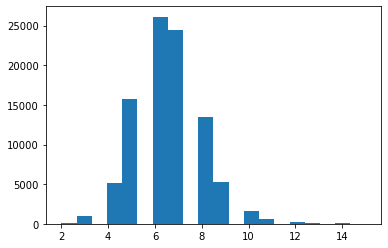

In [17]:
plt.hist(name_length,bins=20)
plt.show()

In [18]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [19]:
x=pad_sequences(df['Name'].values,maxlen=10,padding='pre')

In [20]:
from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model

In [21]:
vocab_size=len(vocab)+1

In [25]:
inp = Input(shape= (10,))
emn = Embedding(input_dim=vocab_size,output_dim=5)(inp)
lstm1 = LSTM(units=32, return_sequences=True)(emn)
lstm2 = LSTM(units=64)(lstm1)
out = Dense(units=1, activation='sigmoid')(lstm2)
my_model = Model(inputs=inp,outputs=out)

In [26]:
my_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 10, 5)             135       
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 32)            4864      
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [27]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [28]:
his=my_model.fit(x,y,epochs=10,batch_size=256,validation_split=0.2)

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75111 samples, validate on 18778 samples
Epoch 1/10
75111/75111 [==============================] - 16s 213us/step - loss: 0.5736 - acc: 0.6341 - val_loss: 0.4030 - val_acc: 0.7680
Epoch 2/10
75111/75111 [==============================] - 17s 231us/step - loss: 0.4079 - acc: 0.7469 - val_loss: 0.3903 - val_acc: 0.7714
Epoch 3/10
75111/75111 [==============================] - 18s 237us/step - loss: 0.3998 - acc: 0.7511 - val_loss: 0.3919 - val_acc: 0.7701
Epoch 4/10
75111/75111 [==============================] - 18s 243us/step - loss: 0.3964 - acc: 0.7525 - val_loss: 0.3876 - val_acc: 0.7719
Epoch 5/10
75111/75111 [==============================] - 17s 231us/step - loss: 0.3929 - acc: 0.7543 - val_loss: 0.3862 - val_acc: 0.7742
Epoch 6/10
75111/75111 [==============================] - 17s 232us/step - loss: 0.3902 - acc: 0.7559 - val_loss: 0.3839 - val_acc: 0.7736
Epoch 7/10
75111/75111 [==============================] - 18s 234us/step - loss: 0.3870 - acc: 0.7577 - val_loss: 0.

In [29]:
h=his.history

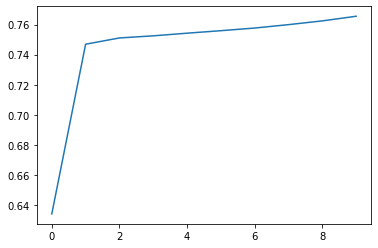

In [30]:
plt.plot(h['acc'])
plt.show()

In [34]:
name="Richard"
test_name=name.lower()
seq=[vocab[i] for i in test_name]
x_test=pad_sequences([seq],10)
x_test

array([[ 0,  0,  0, 18,  9,  3,  8,  1, 18,  4]])

In [35]:
y_pred=my_model.predict(x_test)
y_pred

array([[0.885426]], dtype=float32)

In [36]:
if y_pred <0.5:
  print('Female')
else:
  print('Male')

Male
